In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry.point import Point
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
mt_path = r'D:\NUS\project\LTA_data\commuting_flow_matrix'
mt_file = os.listdir(path = mt_path)
mt_file

['bus',
 'mt_clusters_2020.csv',
 'mt_clusters_2021.csv',
 'mt_early_cases.csv',
 'mt_phase1.csv',
 'mt_phase2.csv',
 'mt_phase3.csv',
 'mt_phase4.csv',
 'sum',
 'train']

In [3]:
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
szone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\MasterPlan_SUBZONE_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
lis_szone = list(set(szone['SUBZONE_N']))
print('the nimber of subzone is: {}'.format(len(lis_szone)))

the nimber of subzone is: 332


In [4]:
def get_total_trips(path,value,file):
    df = pd.read_csv(path+'\\'+file[value])
    print(file[value])
    df['sum'] = 0
    for i in range(len(df)):
        df.loc[i,'sum'] = sum(df.iloc[i,1:-1])
    df_isolated = df.loc[df['sum'] == 0]
    df_isolated.index = range(len(df_isolated))
    df_isolated = df_isolated['SUBZONE_N']
    print('the number of isolated subzone: {}'.format(len(df_isolated)))
    return df_isolated

In [5]:
isolated_szone_2020 = get_total_trips(mt_path,1,mt_file)
isolated_szone_2021 = get_total_trips(mt_path,2,mt_file)
isolated_szone_early_case = get_total_trips(mt_path,3,mt_file)
isolated_szone_phase1 = get_total_trips(mt_path,4,mt_file)
isolated_szone_phase2 = get_total_trips(mt_path,5,mt_file)
isolated_szone_phase3 = get_total_trips(mt_path,6,mt_file)
isolated_szone_phase4 = get_total_trips(mt_path,7,mt_file)

isolated_szone_2020 = list(isolated_szone_2020)
isolated_szone_2021 = list(isolated_szone_2021)
isolated_szone_early_case = list(isolated_szone_early_case)
isolated_szone_phase1 = list(isolated_szone_phase1)
isolated_szone_phase2 = list(isolated_szone_phase2)
isolated_szone_phase3 = list(isolated_szone_phase3)
isolated_szone_phase4 = list(isolated_szone_phase4)

mt_clusters_2020.csv
the number of isolated subzone: 19
mt_clusters_2021.csv
the number of isolated subzone: 22
mt_early_cases.csv
the number of isolated subzone: 28
mt_phase1.csv
the number of isolated subzone: 32
mt_phase2.csv
the number of isolated subzone: 22
mt_phase3.csv
the number of isolated subzone: 22
mt_phase4.csv
the number of isolated subzone: 22


In [6]:
lis1 = [isolated_szone_2020,isolated_szone_2021,isolated_szone_early_case,isolated_szone_phase1,isolated_szone_phase2,isolated_szone_phase3,isolated_szone_phase4]
lis2 = []
for i in lis1:
    len_num = len(i)
    for x in range(0,len_num):
        lis2.append(i[x])
    
lis2 = list(set(lis2))
lis3 = list(np.zeros((32)))

In [22]:
for i in isolated_szone_2021:
    if i not in isolated_szone_early_case:
        print(i)

JURONG ISLAND AND BUKOM
NORTH-EASTERN ISLANDS
SEMAKAU
SUDONG


In [27]:
df_ec = pd.read_csv(mt_path+'\\'+mt_file[1])
df_ec.loc[df_ec['SUBZONE_N'] == 'NORTH-EASTERN ISLANDS']

,SUBZONE_N,ADMIRALTY,AIRPORT ROAD,ALEXANDRA HILL,ALEXANDRA NORTH,ALJUNIED,ANAK BUKIT,ANCHORVALE,ANG MO KIO TOWN CENTRE,ANSON,...,YIO CHU KANG EAST,YIO CHU KANG NORTH,YIO CHU KANG WEST,YISHUN CENTRAL,YISHUN EAST,YISHUN SOUTH,YISHUN WEST,YUHUA EAST,YUHUA WEST,YUNNAN
183,NORTH-EASTERN ISLANDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
for i in lis1:
    for x in range(0,len(lis2)):
        if lis2[x] in i:
            lis3[x] += 1

In [8]:
lis_isolated_all_time = []
for i in range(0,len(lis3)):
    if lis3[i] == 7:
        lis_isolated_all_time.append(lis2[i])

In [9]:
lis_isolated_all_time

['PULAU PUNGGOL BARAT',
 'CHANGI BAY',
 'MARINA EAST',
 'SOUTHERN GROUP',
 'PULAU PUNGGOL TIMOR',
 'MOUNT EMILY',
 'CONEY ISLAND',
 'GARDEN',
 'TANJONG IRAU',
 'PUNGGOL CANAL',
 'SIMPANG SOUTH',
 'CAIRNHILL',
 'PULAU SELETAR',
 'LORONG HALUS NORTH',
 'SIMPANG NORTH']

In [10]:
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

mt_early_cases.csv
the number of isolated subzone: 28


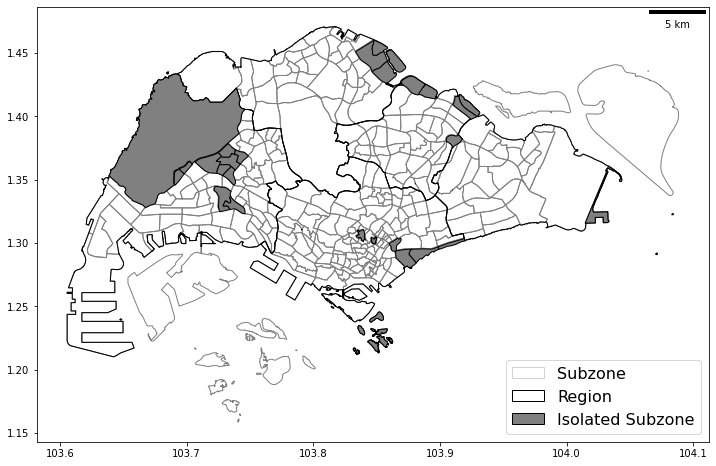

In [21]:
df_isolated_szone = get_total_trips(mt_path,3,mt_file)

fig, ax = plt.subplots(figsize = (20, 8))
szone.plot(ax = ax,facecolor = "none",ec = "grey",label = "Subzone")
region.plot(ax = ax,facecolor = "none",ec = "black",label = "Region")
for i in range(len(df_isolated_szone)):
    szone_n = df_isolated_szone.loc[i]
    df_tmp = szone.loc[szone['SUBZONE_N'] == szone_n].copy()
    df_tmp.plot(ax = ax,facecolor = "grey",ec = "black",label = "Isolated Subzone")

region_patch = mpatches.Patch(facecolor='none',ec = 'black',label = 'region')
subzone_patch = mpatches.Patch(facecolor='none',ec = 'lightgrey',label = 'subzone')
isolated_subzone_patch = mpatches.Patch(facecolor='grey',ec = "black",label = 'islated subzone')

lines = [subzone_patch,region_patch,isolated_subzone_patch]
labels = [t.get_label() for t in ax.collections[0:3]]
ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 16)

ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))

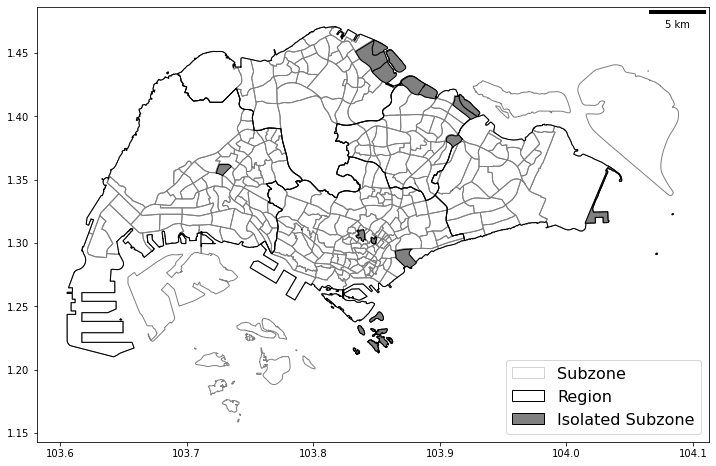

In [18]:
fig, ax = plt.subplots(figsize = (20, 8))
szone.plot(ax = ax,facecolor = "none",ec = "grey",label = "Subzone")
region.plot(ax = ax,facecolor = "none",ec = "black",label = "Region")
for i in range(len(lis_isolated_all_time)):
    szone_n = lis_isolated_all_time[i]
    df_tmp = szone.loc[szone['SUBZONE_N'] == szone_n].copy()
    df_tmp.plot(ax = ax,facecolor = "grey",ec = "black",label = "Isolated Subzone")

region_patch = mpatches.Patch(facecolor='none',ec = 'black',label = 'region')
subzone_patch = mpatches.Patch(facecolor='none',ec = 'lightgrey',label = 'subzone')
isolated_subzone_patch = mpatches.Patch(facecolor='grey',ec = "black",label = 'islated subzone')
lines = [subzone_patch,region_patch,isolated_subzone_patch]
labels = [t.get_label() for t in ax.collections[0:3]]
ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 16)

ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))

In [14]:
bus_stp = gpd.read_file(r"D:\NUS\project\LTA_data\point_data\bus_stops\bus_stops_wszone.shp")

<AxesSubplot:>

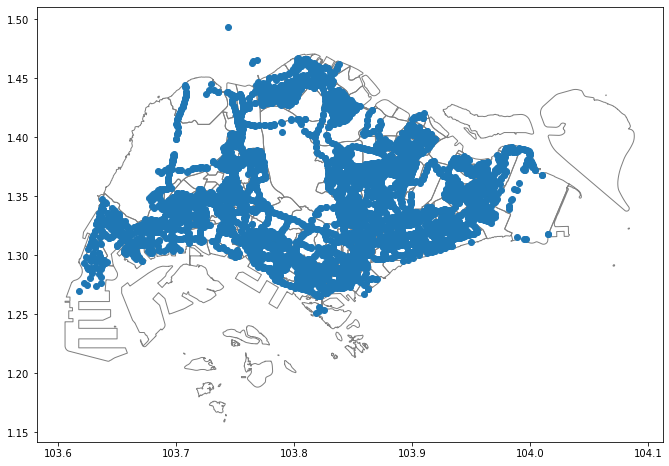

In [15]:
fig, ax = plt.subplots(figsize = (20, 8))
szone.plot(ax = ax,facecolor = "none",ec = "grey",label = "bus_stops")
bus_stp.plot(ax = ax)